<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-teammexcol/blob/main/proyecto-ventas-amazon/semana1-amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 40 **Análisis de ventas de Amazon**

Por:
*   Víctor Alejandro Regueira Romero - A01794404
*   Carlos Julio León Caicedo - A01793947

Profesor asignado:
*   Roberto Antonio Guevara González
---



## Actividad 1

### **El nombre que caracteriza el conjunto de datos.**



Amazon All Categories Best Sellers + Reviews

### **La organización que lo generó.**

amazon.com

### **Incluya un enlace de Internet donde se puedan descargar en línea y enviar como una hoja de cálculo junto con su informe correspondiente.**

https://www.kaggle.com/datasets/tigboatnc/amazon-all-categories-best-sellers-reviews

### **Describe el conjunto de datos. ¿Qué datos contiene?**

Son **1450 registros** de Datos de Amazon EE. UU. sobre **los 50 productos más vendidos** para las 40 categorías enumeradas.

Incluye:

1.     nombre del producto
2.     Categorías de Producto
3.     Ranking de producto en su categoría
4.     Recuento de reseñas de productos (Número de reseñas)
5.     Revisión del producto (primera página de revisiones)
       Incluye Meta + Revisión completa + Calificación otorgada por revisión
6.     Coste del artículo en el momento del raspado.
7.    URL del producto





### **¿Cuáles son algunas de las preguntas de investigación que podría responder con estos datos? Enumere al menos OCHO (no responda las preguntas).**

# Proyecto Amazon Review



## Conexión a Google Drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando Librerías

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Leyendo información

In [40]:
df = pd.read_csv('abs080922 - clear.csv')

## Preparación de datos

In [41]:
df.shape

(1316, 8)

En este dataset tenemos 1450 registros y 8 columnas

In [42]:
df.head()

,Unnamed: 0,product_name,category,categoryRank,noRatings,cost,REVIEWLIST,product_url
0,0,Fire TV Stick with Alexa Voice Remote (include...,Amazon Devices & Accessories,#1,"256,226",$39.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-with-3rd-...
1,1,All-new Ring Video Doorbell (2nd Gen) – 1080p ...,Amazon Devices & Accessories,#2,"112,689",$89.99 - $199.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Ring-Video-Door...
2,2,"Echo Dot (3rd Gen, 2018 release) - Smart speak...",Amazon Devices & Accessories,#3,"936,447",$29.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...
3,3,"Fire TV Stick 4K Max streaming device, Wi-Fi 6...",Amazon Devices & Accessories,#4,"69,684",$54.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-4k-max-wi...
4,4,Amazon Smart Plug,Amazon Devices & Accessories,#5,"508,565",$24.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Amazon-Smart-Plug/dp/B0...


In [43]:
print(f'El dataset tiene {df.shape[0]} registros y cada uno tiene {df.shape[1]} atributos\n')
print('-'*80)
print('Los atributos y sus valores se encuentran a continuación: \n')
for i in df.columns:
    print(f'======== {i} ========\n')
    print(df[i].value_counts().sort_values(ascending=False))
    print('- - ' * 20)

El dataset tiene 1316 registros y cada uno tiene 8 atributos

--------------------------------------------------------------------------------
Los atributos y sus valores se encuentran a continuación: 

======== Unnamed: 0 ========

0       1
19      1
3       1
4       1
5       1
       ..
1313    1
1314    1
1307    1
1297    1
1315    1
Name: Unnamed: 0, Length: 1316, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
======== product_name ========

2017 Topps WWE Road to Wrestlemania HUGE Factory Sealed HANGER Box with 42 Cards includes (5) EXCLUSIVE RTW Cards! Look for Cards,Relics & Autographs of WWE Superstars Sting, Jon Cena,Ric Flair & More    7
Magnum P.I. Tom Selleck as Magnum and John Hillerman as Higgins with dobermans 8 x 10 Inch Photo                                                                                                            4
Where the Crawdads Sing                                                                

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1316 non-null   int64 
 1   product_name  1316 non-null   object
 2   category      1316 non-null   object
 3   categoryRank  1314 non-null   object
 4   noRatings     1316 non-null   object
 5   cost          1316 non-null   object
 6   REVIEWLIST    1316 non-null   object
 7   product_url   1316 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.4+ KB


Tenemos 8 atributos disponibles

## Análisis de Nulos

In [45]:
df.isna().sum().sort_values(ascending = False)

categoryRank    2
Unnamed: 0      0
product_name    0
category        0
noRatings       0
cost            0
REVIEWLIST      0
product_url     0
dtype: int64

**Conclusiones:**

Deberemos de imputar las variables product_name, categoryRank y product_url para no afectar nuestros datos.

## Categorías

En primer lugar observemos el conjunto total de categorías que tenemos.

Número de categorías: 40


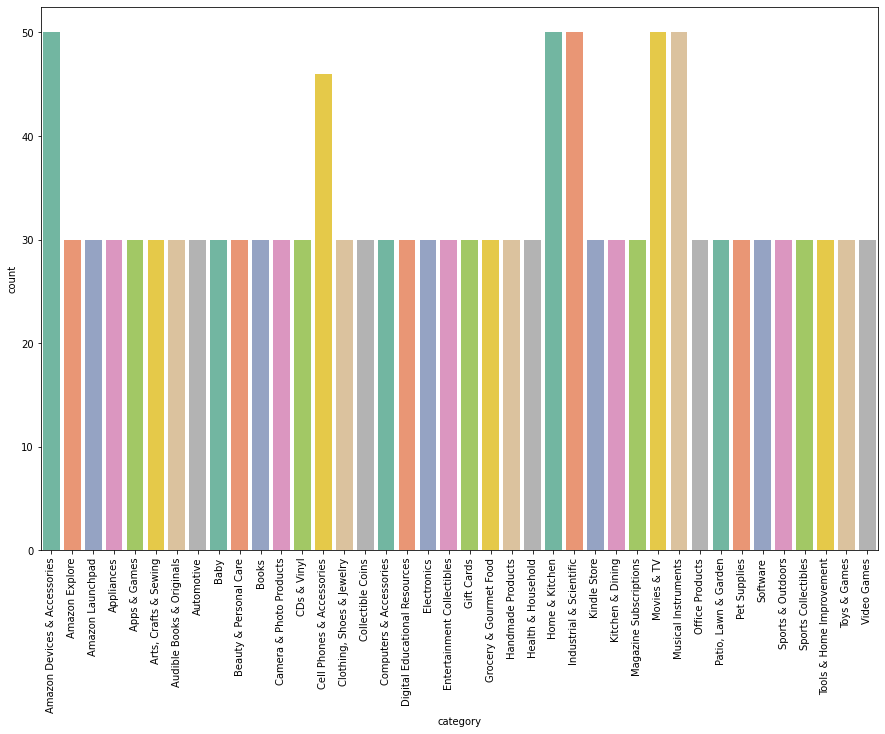

In [46]:
print(f'Número de categorías: {df.category.nunique()}')
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='category',palette='Set2');
plt.xticks(rotation=90);

## Top 10 Categorías

In [47]:
df['category'].value_counts().sort_values(ascending=False).reset_index().head(10).style.background_gradient(axis=0)

,index,category
0,Amazon Devices & Accessories,50
1,Home & Kitchen,50
2,Industrial & Scientific,50
3,Musical Instruments,50
4,Movies & TV,50
5,Cell Phones & Accessories,46
6,Entertainment Collectibles,30
7,Apps & Games,30
8,"Arts, Crafts & Sewing",30
9,Audible Books & Originals,30
